### Automating Port Operations

Step 1 Transfering Images Into Data Frame

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import pandas as pd
import numpy as np

In [2]:
len(tf.config.list_physical_devices('GPU'))

0

In [3]:
tf.random.set_seed(43)

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, zoom_range=0.3, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, zoom_range=0.3, horizontal_flip=True)

In [5]:
dir_name = "./Automating_Port_Operations_dataset"
test_dir = "./test_images"
train_dir = "./train_images"

In [6]:
os.listdir(dir_name)

['buoy',
 'cruise_ship',
 'ferry_boat',
 'freight_boat',
 'gondola',
 'inflatable_boat',
 'kayak',
 'paper_boat',
 'sailboat']

In [7]:
shutil.rmtree(test_dir, ignore_errors=True)
shutil.rmtree(train_dir, ignore_errors=True)
os.makedirs("train_images", exist_ok=True)
os.makedirs("test_images", exist_ok=True)

In [8]:
class_names = os.listdir(dir_name)

In [9]:
# required to seperate images into train test split
for class_n in class_names:
    class_dir = os.path.join(dir_name, class_n)
    train_class_dir = os.path.join(train_dir, class_n)
    test_class_dir = os.path.join(test_dir, class_n)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # List image files in the class directory
    image_files = os.listdir(class_dir)
    
    # Split image files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=43, shuffle=True)
    
    # Move train files to train class directory
    for train_file in train_files:
        src_path = os.path.join(class_dir, train_file)
        dest_path = os.path.join(train_class_dir, train_file)
        shutil.copy(src_path, dest_path)
    
    # Move test files to test class directory
    for test_file in test_files:
        src_path = os.path.join(class_dir, test_file)
        dest_path = os.path.join(test_class_dir, test_file)
        shutil.copy(src_path, dest_path)

In [10]:
training_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset="training", class_mode="categorical")

Found 744 images belonging to 9 classes.


In [11]:
validation_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset="validation", class_mode="categorical")

Found 181 images belonging to 9 classes.


In [12]:
test_set = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 237 images belonging to 9 classes.


In [13]:
237 + 181 + 744

1162

Number of pictures matches the one stated in dataset, so no data loss

In [14]:
print(training_set.class_indices, validation_set.class_indices, test_set.class_indices)

{'buoy': 0, 'cruise_ship': 1, 'ferry_boat': 2, 'freight_boat': 3, 'gondola': 4, 'inflatable_boat': 5, 'kayak': 6, 'paper_boat': 7, 'sailboat': 8} {'buoy': 0, 'cruise_ship': 1, 'ferry_boat': 2, 'freight_boat': 3, 'gondola': 4, 'inflatable_boat': 5, 'kayak': 6, 'paper_boat': 7, 'sailboat': 8} {'buoy': 0, 'cruise_ship': 1, 'ferry_boat': 2, 'freight_boat': 3, 'gondola': 4, 'inflatable_boat': 5, 'kayak': 6, 'paper_boat': 7, 'sailboat': 8}


Build Custom CNN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Flatten

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(name="cnv_layer_1", filters=32, kernel_size=3, activation="relu", input_shape=[224,224,3], padding="same"))

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.add(MaxPool2D(pool_size=2, name="max_pool_layer_1"))

In [19]:
model.add(Conv2D(name="cnv_layer_2", filters=32, kernel_size=3, activation="relu", input_shape=[112,112,3], padding="same"))

In [20]:
model.add(MaxPool2D(pool_size=2, name="max_pool_layer_2"))

In [21]:
model.add(GlobalAveragePooling2D())

In [22]:
model.add(Dense(units=128, name="dense_layer_1", activation="relu"))

In [23]:
model.add(Dense(units=128, name="dense_layer_2", activation="relu"))

In [24]:
model.add(Dense(units=9, name="output", activation="softmax"))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cnv_layer_1 (Conv2D)            │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_1 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnv_layer_2 (Conv2D)            │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_layer_2 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,041 (125.16 KB)

 Trainable params: 32,041 (125.16 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
precision = tf.metrics.Precision()
recall = tf.metrics.Recall()

In [27]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", precision, recall])

In [28]:
g = model.fit(training_set, validation_data=validation_set, epochs=20)

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 644ms/step - accuracy: 0.2643 - loss: 2.0671 - precision: 0.3592 - recall: 0.0176 - val_accuracy: 0.3425 - val_loss: 1.7943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 338ms/step - accuracy: 0.3251 - loss: 1.8056 - precision: 0.1333 - recall: 3.3006e-04 - val_accuracy: 0.3425 - val_loss: 1.7698 - val_precision: 1.0000 - val_recall: 0.0166
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 341ms/step - accuracy: 0.3286 - loss: 1.7961 - precision: 0.6371 - recall: 0.0157 - val_accuracy: 0.3425 - val_loss: 1.7527 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.3314 - loss: 1.7681 - precision: 0.4977 - recall: 0.0078 - val_accuracy: 0.3425 - val_loss: 1.7513 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 330ms/step - accuracy: 0.3406 - loss: 1.7895 - precision: 0.1484 - recall: 0.0017 - val_ac

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
training_loss = g.history["loss"]
val_loss = g.history["val_loss"]

training_acc = g.history["accuracy"]
val_acc = g.history["val_accuracy"]

epochs = [x + 1 for x in range(len(training_loss))]

In [31]:
lossdf1 = pd.DataFrame({"Epochs" : epochs, "Val Loss" : val_loss, "Training Loss" : training_loss})
accdf1 = pd.DataFrame({"Epochs" : epochs, "Val Acc" : val_acc, "Training Acc" : training_acc})

In [32]:
display(accdf1)

,Epochs,Val Acc,Training Acc
0,1,0.342541,0.310484
1,2,0.342541,0.334677
2,3,0.342541,0.334677
3,4,0.342541,0.334677
4,5,0.342541,0.334677
5,6,0.337017,0.334677
6,7,0.364641,0.342742
7,8,0.419890,0.354839
8,9,0.386740,0.366935
9,10,0.403315,0.362903


<Axes: xlabel='Epochs', ylabel='value'>

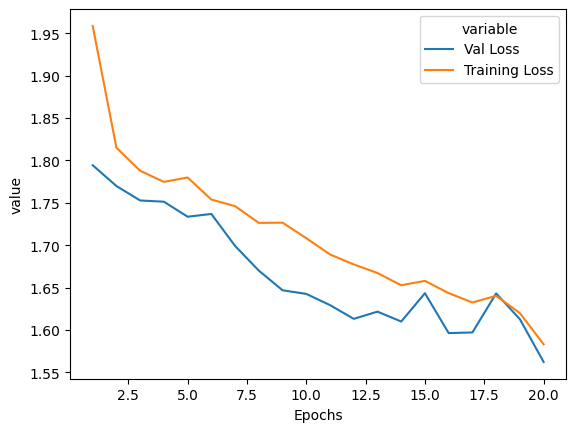

In [33]:
sns.lineplot(x="Epochs", y="value", hue="variable", data=pd.melt(lossdf1, ["Epochs"]))

<Axes: xlabel='Epochs', ylabel='value'>

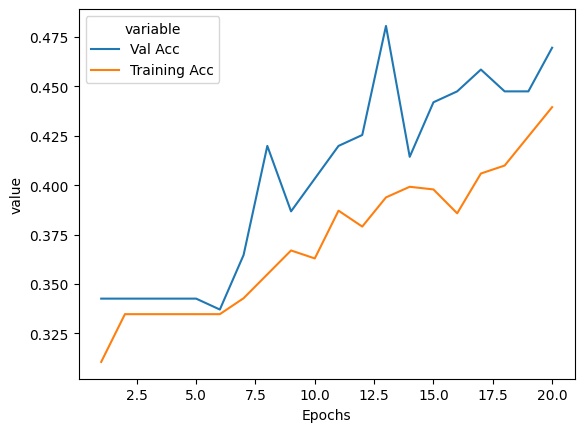

In [34]:
sns.lineplot(x="Epochs", y="value", hue="variable", data=pd.melt(accdf1, ["Epochs"]))

In [35]:
predictions = model.predict(test_set)

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 451ms/step


In [36]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes

In [37]:
metrics = model.evaluate(test_set)



8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 0.4227 - loss: 1.6645 - precision: 0.5065 - recall: 0.1653


In [38]:
print(f"loss {metrics[0]} \naccuracy {metrics[1]}")

loss 1.6210983991622925 
accuracy 0.4345991611480713


In [39]:
from sklearn.metrics import confusion_matrix, classification_report

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

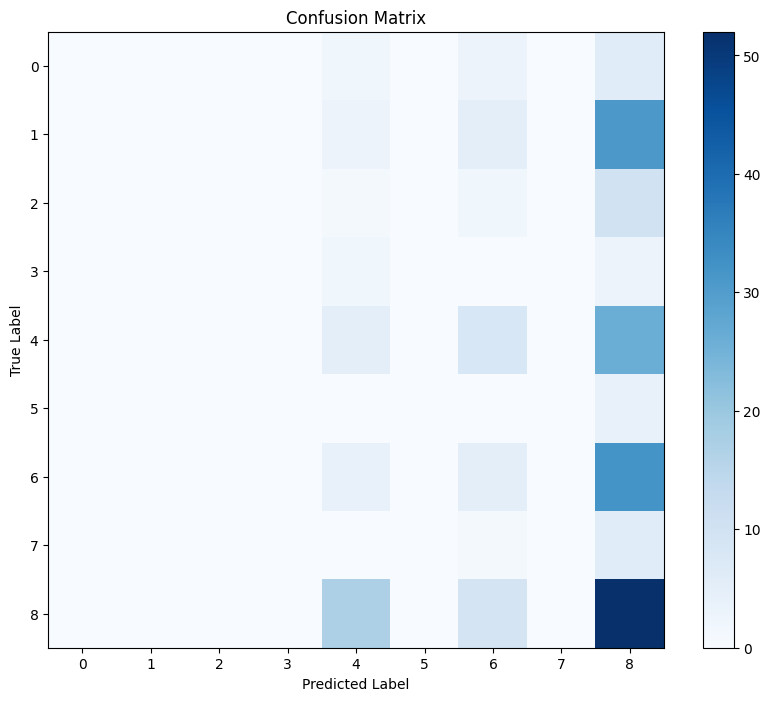

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         5
           4       0.15      0.13      0.14        39
           5       0.00      0.00      0.00         4
           6       0.15      0.12      0.14        41
           7       0.00      0.00      0.00         7
           8       0.31      0.67      0.42        78

    accuracy                           0.26       237
   macro avg       0.07      0.10      0.08       237
weighted avg       0.15      0.26      0.18       237



In [40]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
class_report = classification_report(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("Classification Report")
print(class_report)

Reset The Dataset for the 70:30 split

In [41]:
from tensorflow.keras.applications import MobileNetV2

In [42]:
shutil.rmtree(test_dir)
shutil.rmtree(train_dir)
os.makedirs("train_images", exist_ok=True)
os.makedirs("test_images", exist_ok=True)

In [43]:
for class_n in class_names:
    class_dir = os.path.join(dir_name, class_n)
    train_class_dir = os.path.join(train_dir, class_n)
    test_class_dir = os.path.join(test_dir, class_n)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)
    
    # List image files in the class directory
    image_files = os.listdir(class_dir)
    
    # Split image files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.3, random_state=1, shuffle=True)
    
    # Move train files to train class directory
    for train_file in train_files:
        src_path = os.path.join(class_dir, train_file)
        dest_path = os.path.join(train_class_dir, train_file)
        shutil.copy(src_path, dest_path)
    
    # Move test files to test class directory
    for test_file in test_files:
        src_path = os.path.join(class_dir, test_file)
        dest_path = os.path.join(test_class_dir, test_file)
        shutil.copy(src_path, dest_path)

In [44]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, zoom_range=0.3, horizontal_flip=True, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, zoom_range=0.3, horizontal_flip=True)

In [45]:
training_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset="training", class_mode="categorical")
validation_set = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset="validation", class_mode="categorical")
test_set = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode="categorical")

Found 652 images belonging to 9 classes.
Found 159 images belonging to 9 classes.
Found 351 images belonging to 9 classes.


In [46]:
652 + 159 + 351

1162

Transfer Model

In [47]:
mbnet = MobileNetV2(input_shape=(224,224,3), include_top=False)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
mbnet.trainable = False

In [49]:
trfMod = Sequential()

In [50]:
trfMod.add(mbnet)

In [51]:
trfMod.add(GlobalAveragePooling2D())

In [52]:
trfMod.add(Dropout(0.2))

In [53]:
trfMod.add(Dense(units=256,
                 name="dense_layer_1",
                 activation="relu"))

In [54]:
trfMod.add(BatchNormalization(axis=1))

In [55]:
trfMod.add(Dropout(0.1))

In [56]:
trfMod.add(Dense(units=128,
                 name="dense_layer_2",
                 activation="relu"))

In [57]:
trfMod.add(BatchNormalization(axis=1))

In [58]:
trfMod.add(Dropout(0.1))

In [59]:
trfMod.add(Dense(units=9, name="output", activation="softmax"))

In [60]:
trfMod.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,621,513 (10.00 MB)

 Trainable params: 362,761 (1.38 MB)

 Non-trainable params: 2,258,752 (8.62 MB)

In [61]:
trfMod.compile(optimizer="adam",
               loss="categorical_crossentropy", 
               metrics=["accuracy", precision, recall])

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
monitor = EarlyStopping(monitor = "val_loss", min_delta = 1e-3, patience = 5, verbose = 1, mode = "auto", restore_best_weights = True)

In [64]:
history = trfMod.fit(training_set, validation_data=validation_set, epochs=50, callbacks=[monitor])

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 742ms/step - accuracy: 0.3685 - loss: 2.1538 - precision: 0.5486 - recall: 0.2389 - val_accuracy: 0.7987 - val_loss: 0.7836 - val_precision: 0.9068 - val_recall: 0.6730
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 373ms/step - accuracy: 0.7980 - loss: 0.6321 - precision: 0.8926 - recall: 0.7201 - val_accuracy: 0.7987 - val_loss: 0.7124 - val_precision: 0.8511 - val_recall: 0.7547
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.8857 - loss: 0.3982 - precision: 0.9279 - recall: 0.8302 - val_accuracy: 0.8050 - val_loss: 0.7258 - val_precision: 0.8500 - val_recall: 0.7484
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 371ms/step - accuracy: 0.8933 - loss: 0.3423 - precision: 0.9262 - recall: 0.8559 - val_accuracy: 0.8302 - val_loss: 0.6298 - val_precision: 0.8690 - val_recall: 0.7925
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 0.9292 - loss: 0.2655 - precision: 0.9451 - recall: 0.8898 - val_accuracy: 0.8302 - val_loss: 0

In [65]:
training_loss = history.history["loss"]
val_loss = history.history["val_loss"]

training_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = [x + 1 for x in range(len(training_loss))]

In [66]:
lossdf = pd.DataFrame({"Epochs" : epochs, "Val Loss" : val_loss, "Training Loss" : training_loss})
accdf = pd.DataFrame({"Epochs" : epochs, "Val Acc" : val_acc, "Training Acc" : training_acc})

In [67]:
display(accdf)

,Epochs,Val Acc,Training Acc
0,1,0.798742,0.516871
1,2,0.798742,0.811350
2,3,0.805031,0.883436
3,4,0.830189,0.884969
4,5,0.830189,0.927914
5,6,0.811321,0.898773
6,7,0.830189,0.914110
7,8,0.823899,0.926380
8,9,0.811321,0.953988
9,10,0.842767,0.953988


<Axes: xlabel='Epochs', ylabel='value'>

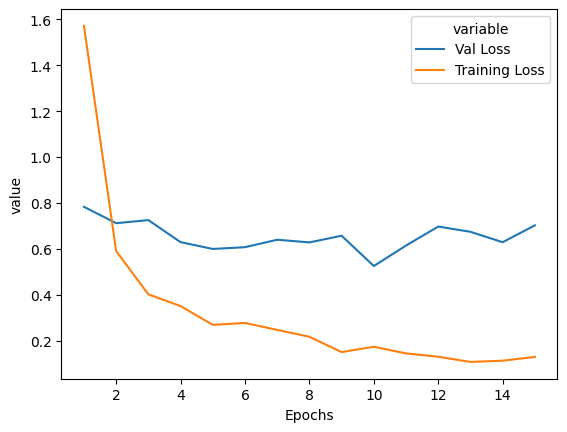

In [68]:
sns.lineplot(x="Epochs", y="value", hue="variable", data=pd.melt(lossdf, ["Epochs"]))

<Axes: xlabel='Epochs', ylabel='value'>

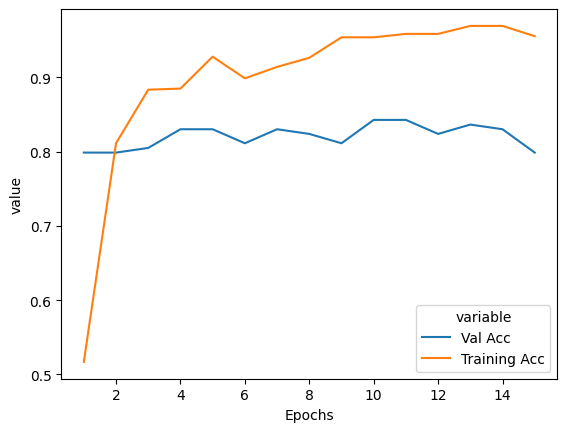

In [69]:
sns.lineplot(x="Epochs", y="value", hue="variable", data=pd.melt(accdf, ["Epochs"]))

In [70]:
predictions = model.predict(test_set)

c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 467ms/step


In [71]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_set.classes

In [72]:
metrics = model.evaluate(test_set)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - accuracy: 0.4198 - loss: 1.5419 - precision: 0.5680 - recall: 0.2183


In [73]:
print(f"loss {metrics[0]} \naccuracy {metrics[1]}")

loss 1.5839954614639282 
accuracy 0.41025641560554504


c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AIML_Projects\Deep Learning Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

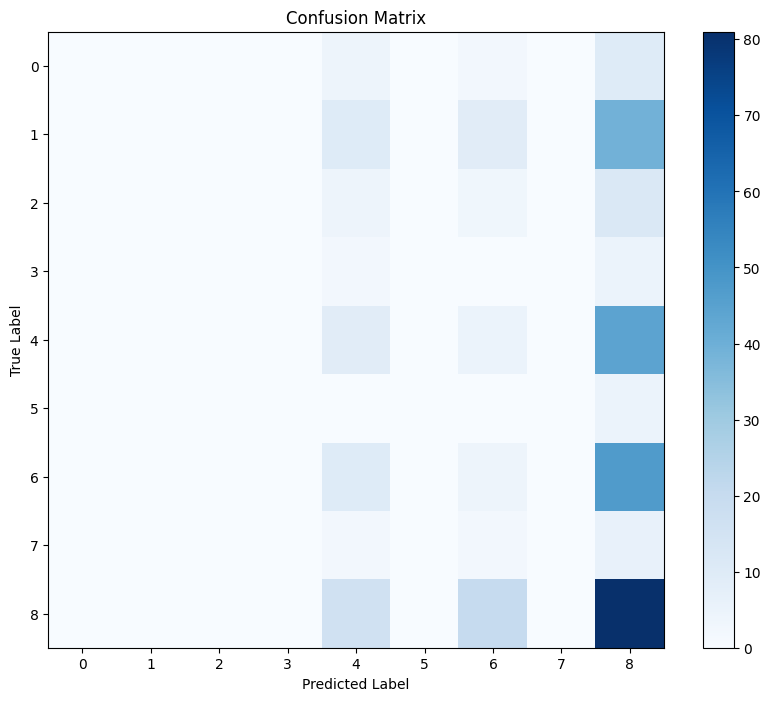

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         7
           4       0.16      0.16      0.16        58
           5       0.00      0.00      0.00         5
           6       0.09      0.07      0.08        61
           7       0.00      0.00      0.00        10
           8       0.33      0.69      0.44       117

    accuracy                           0.27       351
   macro avg       0.06      0.10      0.07       351
weighted avg       0.15      0.27      0.19       351



In [74]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
class_report = classification_report(true_classes, predicted_classes)

plt.figure(figsize=(10,8))
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print("Classification Report")
print(class_report)

### Results

Between the two models, both are unable to properly differentiate between the boats types. The second model has a much greater ability to classify the boats it was trained on, and has a slightly better ability for classifying the test data. I would not use either model in its current trained state for the application.

Over the training epochs, the first model had a smaller amount of change between the intitial validation loss and training loss. Same goes for the accuracy which started at a minimum of 0.32 and increased to a max of 0.41. On the other hand the second model had a better performance in decreasing the loss and increasing accuracy. The test data for both however showed that the both models were equally unable to differentiate untested data. The first model showed a loss of 1.68 and an accuracy of 0.37. The second model showed a loss of 1.63 and an accuracy of 0.44. Both these values means that on untested data, the models cannot classify between the images.

The heatmaps based on the two models which predictions are true and which are not. Both models only predict classifications for the gondola, kayak and sailboat. I believe that with a larger dataset, the second model would have surpassed the first model in terms of classification. There is either an issue of overfitting to the training data, which gave the high accuracy and low loss on that, or it is an issue with the complexity of the neural network, one with less layers may be enough to classify the images. In the future, I would like to add object detection, then classification to allow the model to isolate and focus soley on areas where the boat is located.